## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#Load and reading the dataset
df= pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
#no of rows of included in the dataset
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
#no of unique user_ids
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
#the average of the converted
convrted_mean = df.converted.mean()

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
#defining the number of times where the new page and treatment don't match
df.user_id[(df.landing_page == 'old_page') & (df.group== 'treatment')].count()+ df.user_id[(df.landing_page == 'new_page') & (df.group== 'control')].count()

3893

f. Do any of the rows have missing values?

In [7]:
#checking if there are any missing values
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [8]:
#checking if there are any duplicates in the data
df.user_id.duplicated().sum()

3894

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
#copying the original dataset to make our modifications
df2 = df.copy()

In [10]:
#Drop all the non matching rows in landing page and grou
df2.drop(df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].index, inplace =True)

In [11]:
# Double Check all of the incorrect rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].count()


user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

In [12]:
#rechecking the shape of th data after dropping all the unneeded rows for accuracy issues
df2.shape

(290585, 5)

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [13]:
#checking the no of unique user_ids after dropping the uneeded rows
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [14]:
#the only duplicate row left
df2.user_id[df2.user_id.duplicated()]

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
#all of the information related to the duplicate row left
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [16]:
#checking the data of the repeated ids
df.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [17]:
#dropping the only left duplicate row
df2 = df2[~(df2.user_id.duplicated())]

In [18]:
#rechecking the duplicate row if it is still exists or not
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted


b. Given that an individual was in the `control` group, what is the probability they converted?

In [19]:
pconv_cont = df2.converted[df2['group'] == 'control'].mean()
pconv_cont

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [20]:
pconv_treat = df2.converted[df2['group'] == 'treatment'].mean()
pconv_treat

0.11880806551510564

d. What is the probability that an individual received the new page?

In [21]:
df2.landing_page[df2['landing_page'] == 'new_page'].count()/len(df2)

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

In [22]:
#Probability of converting regardless of page.
df2.converted.mean()

0.11959708724499628

In [23]:
#actual difference between control and treatment groups
actual_difference = pconv_treat - pconv_cont

<font color='darkblue'>

**My Answer**

</font>

<font color='reddish brown'>
As per the conversion rates for each page which are 0.1188 for the new page and 0.1203 for the old page. They are almost equal to each other, so it's a bit difficult to outweigh any of them and it's recommended to include other parameters to help us determine if the new treatment page leads to more conversions or not.
    </font>

In [24]:
df2['date'] = pd.to_datetime(df2['timestamp']).dt.date
df2['date'].max() - df2['date'].min(), df2.user_id.count()

(datetime.timedelta(22), 290584)

<font color='darkblue'>

**My Answer**

</font>

<font color='reddish brown'>

Based on the timespan and the number of users involved to test the interaction over the new page compared to the old page. I see that both factors are fair enough and we might not need to cover a larger duration.

</font>

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.



<font color='reddish brown'>


### Null: Pold - Pnew => 0
### Alternative: Pold - Pnew < 0
### Alpha: 5%

</font>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [25]:
pnew = df2.converted.mean()
pnew

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [26]:
pold = df2.converted.mean()
pold

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [27]:
N_new = df2.query('group == "treatment" and landing_page == "new_page"').count()[0]
N_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [28]:
N_old =df2.query('group == "control" and landing_page == "old_page"').count()[0]
N_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [29]:
new_page_converted = np.random.choice([0,1], N_new, replace =True, p =[1 - pnew, pnew])
new_page_converted = new_page_converted.mean()
new_page_converted

0.11938613997660175

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [30]:
old_page_converted = np.random.choice([0,1], N_old,replace =True, p =[1- pold, pold])
old_page_converted = old_page_converted.mean()
old_page_converted

0.11879620579043738

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [31]:
obs_diff = new_page_converted - old_page_converted
obs_diff

0.000589934186164362

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.


<font color='reddish brown'>

We shall do a sampling distribution where we can see the difference changes from one sample to another and see the distribution.Then, we shall simulate 10000 times.

</font>

In [32]:
p_diffs = []

pnew = df2.converted.mean()
pold = df2.converted.mean()
N_new = df2.query('group == "treatment" and landing_page == "new_page"').shape[0]
N_old =df2.query('group == "control" and landing_page == "old_page"').shape[0]
    
for _ in range (10000):
    new_page_converted = np.random.choice([0,1], N_new, replace =True, p =[1 - pnew, pnew])
    old_page_converted = np.random.choice([0,1], N_old, replace =True, p =[1- pold, pold])
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

<font color='darkblue'>

**My Answer**

</font>

<font color='reddish brown'>
    
As per the central limit theorem, due to having large sample size, the sampling distribution of the mean differences will be normally distributed.
    
</font>

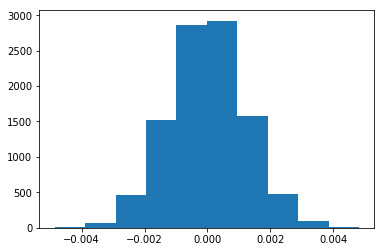

In [33]:
plt.hist(p_diffs);

<font color='darkblue'>

**My Answer**

</font>

<font color='reddish brown'>
    
Then, we shall trasnform our list to an array to be easily dispalyed using the histogram and centered about the zero point to showcase how the mean differences between both pages look like. Besides plotting the statistic line over the histogram to see which part we shall shade. As the alternative hypothesis is larger than zero, we will shade the area to the right of the statistic.

Moreover, we shall use the std of the sampling distribution to determine what the sampling distribution would look like if it came from the null hypothesis and simlualting from the normal.

</font>

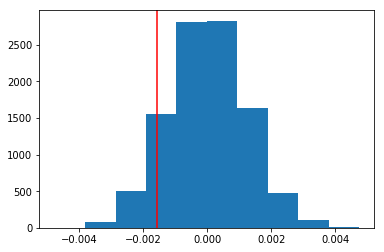

In [34]:
p_diffs = np.array(p_diffs)
nulls = np.random.normal(0, p_diffs.std(), p_diffs.size)
plt.hist(nulls)
plt.axvline(x= actual_difference, color ='red' );

<font color='darkblue'>

**My Answer**

</font>

<font color='reddish brown'>


Additional step to look at where most of the data fall with a confidence interval of 95%.

</font>

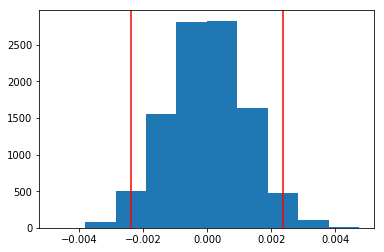

In [35]:
plt.hist(nulls)
plt.axvline(x= np.percentile(p_diffs, 2.5), color ='red' )
plt.axvline(x= np.percentile(p_diffs, 97.5), color ='red' );

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [36]:
pval = (nulls > actual_difference).mean()
pval

0.9012

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

<font color='darkblue'>

**My Answer**

</font>

<font color='reddish brown'>

After checking that the statitic is in the bulk of the distribution, this suggested that the statistic was likely from that null. Then, we calculated p value based on the shaded region to the right starting at the value of our statistic or the proportion of values in the null distribution that were greater than our actual difference. So, this indicates that the old page converts better or equal to the new page.

And we got high p value which means that there is a high probability to observe our statistic from the null.

As per the mentioned "Type I error threshold: 0.05"
The p-value > 0.05: there is a weak evidence against the null.

Since the p-value is almost 0.9, we don't have statistically significent evidence that suggests the new page
converts better. Therefore, we fail to reject the null.

</font>

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [37]:
import statsmodels.api as sm

convert_old = df2.user_id[(df2.landing_page == 'old_page') & (df2.converted == 1)].count()
convert_new = df2.user_id[(df2.landing_page == 'new_page') & (df2.converted == 1)].count()
n_old = df2.user_id[(df2.landing_page == 'old_page')].count()
n_new = df2.user_id[(df2.landing_page == 'new_page')].count()

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [38]:
ztest = sm.stats.proportions_ztest([convert_new,convert_old],[n_new, n_old], alternative= 'larger' )
zscore = ztest[0]
print('zscore is {}'.format(zscore))
pvalue = ztest[1]
print('pvalue is {}'.format(pvalue))

zscore is -1.3109241984234394
pvalue is 0.9050583127590245


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

<font color='darkblue'>

**My Answer**

</font>

<font color='reddish brown'>
    
Source depended on "https://www.statisticshowto.com/probability-and-statistics/find-critical-values/


While having a large sample, z test would be suitable to get the P value. As the alpha is 0.05 and confidence interval of 95% which has a critical z score of 1.96 ad -1.96. And our z score lies between the mentioned values, so we have no sufficient evidence to reject the null. Furthermore, the resulted p value matches the one in part J.

</font>

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

<font color='darkblue'>

**My Answer**

</font>

<font color='reddish brown'>

Logistic Regression would be the best fit as the approach that help predict two possible outcomes which matches our case here.

</font>

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [39]:
#create dummy variables for group column in addition to creating the intercept
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2['intercept']=1

In [40]:
df2.head()

,user_id,timestamp,group,landing_page,converted,date,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,2017-01-21,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,2017-01-12,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,2017-01-11,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,2017-01-08,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,2017-01-21,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [41]:
#fitting our model to find the summary results
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = model.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-07 21:06 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [42]:
#exonentiating the parameters
np.exp(results.params)

intercept    0.136863
ab_page      0.985123
dtype: float64

In [43]:
#getting their reciprocals
1/np.exp(results.params)

intercept    7.306593
ab_page      1.015102
dtype: float64

<font color='darkblue'>

**My Answer**

</font>

<font color='reddish brown'>

Firslty we should exponentiate our coefficients, then get the reciprocal as they are less than one. Consequently, it refers to the predicted decrease where the new page has less 1.05 conversion rate compared to our baseline "old page".

</font>

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

<font color='darkblue'>

**My Answer**

</font>

<font color='reddish brown'>


The regression model gave us a pvalue of 0.1899 of the ab_page which is higher than the significance level 0.05. So, we fail to reject the null hypothesis. Then, it differs as in part 2 as they have different hypohteses. Over and above, P value in part 2 gives an indication which page has a higher conversion rates on average while P value in part 3 gives an indication of how significant the variable to our model.

Regarding the null and alternative hypotheses from the regression model perspetive:

H0: Pold - Pnew = 0

H1: Pold-Pnew != 0

We would compare between the hypotheses depending on their outcome as both of them resulted in failing to reject the null

</font>


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

<font color='darkblue'>

**My Answer**

</font>

<font color='reddish brown'>


Well, considering new factors would be a favor to give insights from many different perspectives which give a sort of solid base to determine upon. However, such additional factors may lead to other issues like multicollinearity, etc.

</font>

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [44]:
#reading the countries dataset
df4 = pd.read_csv('countries.csv')
df4.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [45]:
#merging the countries and df2 datasets to include other factor like country for out model
df_new = df4.set_index('user_id').join(df2.set_index('user_id'), how = 'inner')

In [46]:
df_new.head()

,country,timestamp,group,landing_page,converted,date,ab_page,intercept
user_id,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,2017-01-14,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,2017-01-23,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,2017-01-16,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,2017-01-22,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,2017-01-16,1,1


In [47]:
df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [48]:
df_new[['CA', 'UK']] = pd.get_dummies(df_new['country'])[['CA', "UK"]]

In [49]:
#making the logistic regression model and our baseline is US
model_count = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'CA']])
results = model_count.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-07 21:06 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
==================================================================

"""

In [50]:
np.exp(0.0099), 1/np.exp(-0.0408)

(1.0099491671175422, 1.0416437559600236)

<font color='darkblue'>

**My Answer**

</font>

<font color='reddish brown'>

UK has 1.099 higher rate of conversion compared to our baseline
While CA hs 1.04 lower rate of conversion compared to our baseline

</font>

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
#creating interaction between the country and the page by multiplying one another
df_new['ab-page_UK'] = df_new['ab_page']*df_new['UK']
df_new['ab-page_CA'] = df_new['ab_page']*df_new['CA']

In [52]:
#making the logistic regression model and our baseline is US besides inclusing the interaction as well
model_count_int = sm.Logit(df_new['converted'], df_new[['intercept', 'UK', 'CA', 'ab-page_UK', 'ab-page_CA']])
results = model_count_int.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-11-07 21:06 AIC:              212782.9259
No. Observations:   290584           BIC:              212835.8241
Df Model:           4                Log-Likelihood:   -1.0639e+05
Df Residuals:       290579           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
UK            0.0045    0.0175     0.2572  0.7970  -0.0298   0.0389
CA           -0.0073    0.0371    -0.1963  0.8444  -0.0799   0.0654
ab-page_UK    0.0108    0.0228     0.4749  0.6349  -0.0339   0.0555
ab-page_CA   -0.0674    0.0520    -1.2967  0.1947  -0.1694   0.0345
==================================================================

"""

In [53]:
np.exp(0.0045), 1/np.exp(-0.0073), np.exp(0.0108), 1/np.exp(-0.0674)

(1.0045101402046013, 1.0073267099546657, 1.010858530520097, 1.0697232819209153)

<font color='darkblue'>

**My Answer**

</font>

<font color='reddish brown'>
    
UK has a higher conversion rate of 1.004 while CA has a lower conversion rate of 1.007 compared to our baseline. They still look as the same as the former model. On the other hand, the interaction between the page and the country give us some hints that the conversion rate in UK is a a bit higher while in CA is a bit lower. However, all of these parameters show high P value which is also higher than the significance level. Thus, all of them are statistical insignificant and we still fail to reject the null hypothesis.

</font>

In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0